# *btest* initial steps

step-by-step

In [1]:
import os
import time
import numpy as np
import pandas as pd
from btest import utils
from btest import blockplot
from scipy.stats import t
from btest import btest

In [8]:
method = 'spearman'
min_var = 0.0
fdr = 0.1

In [9]:
# dataX, dataY, featuresX, featuresY = utils.readData('../demo/X_dataset.txt', '../demo/Y_dataset.txt', min_var=min_var)
dataX, dataY, featuresX, featuresY = utils.readData('~/Downloads/microbe.txt', '~/Downloads/amino.txt', min_var=min_var)


--- 38 samples/columns with all missing values have been removed from the second dataset 
--- 19 features with variation equal or less than 0.000 have been removed from the first dataset 
--- 1 features with variation equal or less than 0.000 have been removed from the second dataset 
Dataset X dimension  after cleaning:  (107, 49)
Dataset Y dimension  after cleaning:  (249, 49)


In [10]:
%%time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

CPU times: user 1.65 s, sys: 38.6 ms, total: 1.69 s
Wall time: 2.22 s


In [11]:
X_Y.head()

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
10908,Alloprevotella,Peptococcus,1.0,49.0,inf,0.0,0.0,0.003422,X_X
10917,Alloprevotella,Eisenbergiella,1.0,49.0,inf,0.0,0.0,0.003422,X_X
10920,Alloprevotella,Coprobacter,1.0,49.0,inf,0.0,0.0,0.003422,X_X
10931,Alloprevotella,Leuconostoc,1.0,49.0,inf,0.0,0.0,0.003422,X_X
21550,Candidatus Stoquefichus,Eubacterium,1.0,49.0,inf,0.0,0.0,0.003422,X_X


In [12]:
nas = np.isnan(dataAll[0] + dataAll[1])
not_na = sum(~nas)
not_na

49

In [13]:
X_Y[(X_Y['Feature_1'] == 'X0') & (X_Y['Feature_2'] == 'Y66')]

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type


In [14]:
%%time
X_Y_3 = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

CPU times: user 1 s, sys: 22.5 ms, total: 1.03 s
Wall time: 1.43 s


In [15]:
X_Y_3.head()

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
10908,Alloprevotella,Peptococcus,1.0,49.0,inf,0.0,0.0,0.003422,X_X
10917,Alloprevotella,Eisenbergiella,1.0,49.0,inf,0.0,0.0,0.003422,X_X
10920,Alloprevotella,Coprobacter,1.0,49.0,inf,0.0,0.0,0.003422,X_X
10931,Alloprevotella,Leuconostoc,1.0,49.0,inf,0.0,0.0,0.003422,X_X
21550,Candidatus Stoquefichus,Eubacterium,1.0,49.0,inf,0.0,0.0,0.003422,X_X


In [ ]:
err = []
for i in range(X_Y.shape[0]):
    var1, var2 = X_Y.iloc[i, [0, 1]]
    a = X_Y.loc[(X_Y.loc[:, 'Feature_1'] == var1) & (X_Y.loc[:, 'Feature_2'] == var2), 'complete_obs'].values[0]
    b = X_Y_3.loc[(X_Y_3.loc[:, 'Feature_1'] == var1) & (X_Y_3.loc[:, 'Feature_2'] == var2), 'complete_obs'].values[0]
    if a != b:
        err.append([var1, var2])

In [ ]:
err

In [ ]:
err = []
for i in range(X_Y_3.shape[0]):
    if X_Y_3.iloc[i, 8] == 'X_Y':
        var1, var2 = X_Y_3.iloc[i, [0, 1]]
        var1 = int(var1.split('X')[-1])
        var2 = int(var2.split('Y')[-1])
        #     print(var1, var2)
        a = sum(~np.isnan(dataX[var1] + dataY[var2]))
        b = X_Y_3.iloc[i, 3]
        #     print(a,b)
        if a != b:
            err.append([i, var1, var2])

In [ ]:
err

In [ ]:
X_Y_3[(X_Y_3['Feature_1'] == 'X0') & (X_Y_3['Feature_2'] == 'Y66')]

In [ ]:
X_Y_3.loc[:, 'Type'].value_counts()

In [ ]:
X_Y[(X_Y['Feature_1'] == 'X0') & (X_Y['Feature_2'] == 'Y66')]

In [ ]:
X_Y_32 = X_Y_3[X_Y_3["Type"] == "X_Y"]

In [ ]:
X_Y_32

In [ ]:
simtable = pd.pivot(X_Y_32, index="Feature_1", columns="Feature_2", values='Correlation')  #Reshape from long to wide

In [ ]:
simtable

In [ ]:
t1 = time.time()
for i in range(1000):
    i
t2 = time.time()
print(t2 - t1)

In [ ]:
nrow = 5000
ncol = 100
aa = np.array(np.random.random(size=nrow * ncol), dtype=np.float32)
aa[np.random.randint(0, nrow * ncol, size=int(nrow * ncol / 20))] = np.nan
aa = aa.reshape((nrow, ncol))
feature_names = ['P' + str(i) for i in range(nrow)]

In [ ]:
% % time
#test
test_withinX = utils.btest_corr_3(aa, features=feature_names, method=method, fdr=fdr, Type='withinX')

In [ ]:
% % time
test_withinX = utils.btest_corr_3(aa, features=feature_names, method='pearson', fdr=fdr, Type='withinX')

In [ ]:
test_withinX.head()

In [ ]:
df_test = pd.DataFrame(aa.T)

In [ ]:
% % time
cr_test = df_test.corr(method='spearman')

In [ ]:
X_Y[(X_Y['Feature_1'] == 'X0') & (X_Y['Feature_2'] == 'Y66')]

In [ ]:
% % time
X_Y_3 = utils.btest_corr_3(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
for i in iRow:
    for j in iCol:
        if i <= j:
            #print(i, j)
            #print(dataAll[i])
            X = dataAll[i]
            Y = dataAll[j]
            nas = np.logical_or(X != X, Y != Y)
            not_na = sum(~nas)
            #X = Y[~nas]
            #Y = Y[~nas]
            #new_X, new_Y = remove_pairs_with_a_missing(X, Y)
            correlation = cr[i, j]
            pval = pv[i, j]
            tests.append([features[i], features_y[j], pval, correlation, not_na])
results = pd.DataFrame(tests, columns=['Feature_1', 'Feature_2', 'pval', 'Correlation', 'Not_NAs'])

p_adust, p_threshold = utils.bh(results["pval"].values, fdr)

results["P_adusted"] = p_adust
results["bh_fdr_threshold"] = p_threshold
results['Type'] = Type
results = results.sort_values(['pval', 'Correlation'],
                              ascending=[True, False])

In [ ]:
X_Y_3[(X_Y_3['Feature_1'] == 'X0') & (X_Y_3['Feature_2'] == 'Y66')]

In [ ]:
X_Y_3.loc[:, 'Type'].value_counts()

In [ ]:
# creating the complete dataset
#dataAll_df = pd.DataFrame(dataAll.T, columns=featuresAll)

In [ ]:
X_Y_3.loc[:, 'Type'] = X_Y_3.Feature_1.str[-1] + X_Y_3.Feature_2.str[-2:]

In [ ]:
X_Y_3.head()

In [ ]:
dataAll = dataX
features = featuresX
features_y = None
Type = 'withinX'
iRow = list(range(0, len(features)))
if Type == 'X_Y':
    iCol = list(range(len(features), len(features) + len(features_y) - 1))
    features_y = features + features_y
else:
    features_y = features
    iCol = list(range(len(features)))
tests = []

# creating the complete dataset
dataAll2 = pd.DataFrame(dataAll.T, columns=features_y)
cr = dataAll2.corr(method=method)

# calculating t-statistics, based on the correlations
t_stat = (cr * (dataAll2.shape[0] - 2) ** .5) / (1 - cr ** 2) ** .5

# calculating p-values based on the t-statistics
pv = 2 * (1 - t.cdf(abs(t_stat), df=dataAll2.shape[0] - 2))
#rho_long_format = cr.stack().reset_index().rename(columns={'level_0':'Feature_1','level_1':'Feature_2', 0:'Correlation'})
#pval_long_format = pv.stack().reset_index().rename(columns={'level_0':'Feature_1','level_1':'Feature_2', 0:'pval'})
#results = pd.concat([pval_long_format, rho_long_format["Correlation"]], axis=1)


In [ ]:
cr = cr.to_numpy()
#pv = pv.to_numpy()

In [ ]:
for i in iRow:
    for j in iCol:
        if i <= j:
            #print(i, j)
            #print(dataAll[i])
            X = dataAll[i]
            Y = dataAll[j]
            nas = np.logical_or(X != X, Y != Y)
            not_na = sum(~nas)
            #X = Y[~nas]
            #Y = Y[~nas]
            #new_X, new_Y = remove_pairs_with_a_missing(X, Y)
            correlation = cr[i, j]
            pval = pv[i, j]
            tests.append([features[i], features_y[j], pval, correlation, not_na])
results = pd.DataFrame(tests, columns=['Feature_1', 'Feature_2', 'pval', 'Correlation', 'Not_NAs'])

p_adust, p_threshold = bh(results["pval"].values, fdr)

results["P_adusted"] = p_adust
results["bh_fdr_threshold"] = p_threshold
results['Type'] = Type
results = results.sort_values(['pval', 'Correlation'],
                              ascending=[True, False])

In [ ]:
# feature names for the complete dataset
featuresAll = featuresX.copy()
featuresAll.extend(featuresY)

In [ ]:
results

In [ ]:
# creating the complete dataset
dataAll_df = pd.DataFrame(dataAll.T, columns=featuresAll)

In [ ]:
% % time
# correlation
cr = dataAll_df.corr(method='pearson')

# calculaing t-statistics, based on the correlations
t_stat = (cr * (dataAll_df.shape[0] - 2) ** .5) / (1 - cr ** 2) ** .5

# calculating p-values based on the t-statistics
pv = 2 * (1 - t.cdf(abs(t_stat), df=dataAll_df.shape[0] - 2))

In [ ]:
cr

In [ ]:
% % time
# correlation
cr = dataAll_df.corr(method='pearson')

# calculaing t-statistics, based on the correlations
t_stat = (cr * (dataAll_df.shape[0] - 2) ** .5) / (1 - cr ** 2) ** .5

# calculating p-values based on the t-statistics
pv = 2 * (1 - t.cdf(abs(t_stat), df=dataAll_df.shape[0] - 2))

In [ ]:
X_Y

In [ ]:
within_X

In [ ]:
within_Y

In [ ]:
X_Y.pval

In [ ]:
outputpath = "/Users/rah/Documents/omicsEye/btest/demo/btest_output"
os.makedirs(outputpath, exist_ok=True)
X_Y.to_csv(outputpath + '/X_Y.tsv', sep="\t")
#rho_X = rho.iloc[0:500, 0:500]
#rho_X.to_csv(outputpath + '/simtable_X.tsv', sep="\t")
#rho_X_Y.to_csv(outputpath + '/simtable.tsv', sep="\t")
within_X.to_csv(outputpath + '/within_X.tsv', sep="\t")
within_Y.to_csv(outputpath + '/within_Y.tsv', sep="\t")

In [ ]:
#associations = blockplot.load_associations(path = outputpath + '/X_Y.tsv')
associations = blockplot.load_associations(
    '/Users/rah/Dropbox/Ali-Docs/Research_docs/Projects/VastBiome/analysis/btest_bgc_mgx_replaceNA_FALSE_cov_25_measure_rpkg_mbx_pair_spearman_new/X_Y.tsv')

In [ ]:
outputpath

In [ ]:
associations

In [ ]:
#simtable = blockplot.load_order_table(outputpath + '/simtable.tsv', associations)
simtable = blockplot.load_order_table(
    '/Users/rah/Dropbox/Ali-Docs/Research_docs/Projects/VastBiome/analysis/btest_bgc_mgx_replaceNA_FALSE_cov_25_measure_rpkg_mbx_pair_spearman_new//simtable.tsv',
    associations)

In [ ]:
X_Y

In [ ]:
blockplot.plot(
    simtable,
    associations,
    cmap="RdBu_r",
    mask=False,
    axlabels=["", ""],
    outfile="/Users/rah/Documents/omicsEye/btest/demo/btest_output/blockplot.pdf",
    similarity="Spearman"
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [ ]:
X_Y_3.head()

In [ ]:
n = 2
row = X_Y_3.iloc[n, :]
var1 = row.loc['Feature_1']
var2 = row.loc['Feature_2']
print(var1)
comp_type = row.loc['Type']
var1_ind = int(var1[1:])
var2_ind = int(var2[1:])
print(comp_type)

In [ ]:
text_dict = {}
text_ann = ''
for key in ['Correlation', 'complete_obs', 'P_adjusted']:
    text_dict[key] = row.loc[key]
    text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

In [ ]:
if comp_type == 'X_X':
    var1_val = dataX[var1_ind]
    var2_val = dataX[var2_ind]
elif comp_type == 'X_Y':
    var1_val = dataX[var1_ind]
    var2_val = dataY[var2_ind]
else:
    var1_val = dataY[var1_ind]
    var2_val = dataY[var2_ind]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
plt.scatter(x=var1_val, y=var2_val,
            edgecolors='#000',
            linewidths=.5,
            c='#123435', alpha=.5,
            marker="o")
plt.xlabel(var1)
plt.ylabel(var2)
if text_dict['Correlation'] > 0:
    plt.text(0.02, .7, text_ann, fontstyle='italic',
             transform=ax.transAxes, fontsize=8)
else:
    plt.text(0.8, .7, text_ann, transform=ax.transAxes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(str(var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
plt.show()

In [ ]:
def b_scatter(dataX, dataY, b_test, n_ind, min_var=0, report_dir='.'):
    assert type(dataX) == type(dataY), 'Type of dataX and dataY should be the same.'
    if isinstance(dataX, str):
        dataX, dataY, _, _ = utils.readData(dataX, dataY, min_var=min_var)
    if isinstance(b_test, str):
        b_test = pd.read_csv(btest)

    for n in n_ind:
        row = b_test.iloc[n, :]
        var1 = row.loc['Feature_1']
        var2 = row.loc['Feature_2']

        comp_type = row.loc['Type']
        var1_ind = int(var1[1:])
        var2_ind = int(var2[1:])

        text_dict = {}
        text_ann = ''
        for key in ['Correlation', 'complete_obs', 'P_adjusted']:
            text_dict[key] = row.loc[key]
            text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

        if comp_type == 'X_X':
            var1_val = dataX[var1_ind]
            var2_val = dataX[var2_ind]
        elif comp_type == 'X_Y':
            var1_val = dataX[var1_ind]
            var2_val = dataY[var2_ind]
        else:
            var1_val = dataY[var1_ind]
            var2_val = dataY[var2_ind]

        fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
        plt.scatter(x=var1_val, y=var2_val,
                    edgecolors='#000',
                    linewidths=.5,
                    c='#123435', alpha=.5,
                    marker="o")
        plt.xlabel(var1)
        plt.ylabel(var2)
        if text_dict['Correlation'] > 0:
            plt.text(0.02, .7, text_ann, fontstyle='italic',
                     transform=ax.transAxes, fontsize=8)
        else:
            plt.text(0.8, .7, text_ann, transform=ax.transAxes)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(str(report_dir + '/' + var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
        plt.show()
    return 'Done'

In [ ]:
b_scatter(dataX=dataX, dataY=dataY, b_test=X_Y_3, n_ind=[1, 24, 67])

In [ ]:
b_scatter(dataX='../demo/X_dataset.txt', dataY='../demo/Y_dataset.txt', b_test=X_Y_3, n_ind=[32])

In [ ]:
X_Y_3.to_csv('../notebooks/b_test_res.csv', index=False)

In [ ]:
dataX, dataY, featuresX, featuresY = utils.readData('../demo/donotaddtogithub/lipids.txt',
                                                    '../demo/donotaddtogithub/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

# amino microbe test

In [ ]:
method = 'spearman'
min_var = 0.0
fdr = 0.05

In [ ]:
dataX, dataY, featuresX, featuresY = utils.readData('/Users/mbagh/Downloads/amino.txt',
                                                    '/Users/mbagh/Downloads/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

In [ ]:
within_X

In [ ]:
X_Y['Type'].value_counts()

In [ ]:
x = dataX[featuresX.index('N-acetylhistidine')]
y = dataX[featuresX.index('metformin')]

In [ ]:
x

In [ ]:
y

In [ ]:
outputpath

In [ ]:
associations

In [ ]:
#simtable = blockplot.load_order_table(outputpath + '/simtable.tsv', associations)
simtable = blockplot.load_order_table(
    '/Users/rah/Dropbox/Ali-Docs/Research_docs/Projects/VastBiome/analysis/btest_bgc_mgx_replaceNA_FALSE_cov_25_measure_rpkg_mbx_pair_spearman_new//simtable.tsv',
    associations)

In [ ]:
X_Y

In [ ]:
blockplot.plot(
    simtable,
    associations,
    cmap="RdBu_r",
    mask=False,
    axlabels=["", ""],
    outfile="/Users/rah/Documents/omicsEye/btest/demo/btest_output/blockplot.pdf",
    similarity="Spearman"
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [ ]:
X_Y_3.head()

In [ ]:
n = 2
row = X_Y_3.iloc[n, :]
var1 = row.loc['Feature_1']
var2 = row.loc['Feature_2']
print(var1)
comp_type = row.loc['Type']
var1_ind = int(var1[1:])
var2_ind = int(var2[1:])
print(comp_type)

In [ ]:
text_dict = {}
text_ann = ''
for key in ['Correlation', 'complete_obs', 'P_adjusted']:
    text_dict[key] = row.loc[key]
    text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

In [ ]:
if comp_type == 'X_X':
    var1_val = dataX[var1_ind]
    var2_val = dataX[var2_ind]
elif comp_type == 'X_Y':
    var1_val = dataX[var1_ind]
    var2_val = dataY[var2_ind]
else:
    var1_val = dataY[var1_ind]
    var2_val = dataY[var2_ind]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
plt.scatter(x=var1_val, y=var2_val,
            edgecolors='#000',
            linewidths=.5,
            c='#123435', alpha=.5,
            marker="o")
plt.xlabel(var1)
plt.ylabel(var2)
if text_dict['Correlation'] > 0:
    plt.text(0.02, .7, text_ann, fontstyle='italic',
             transform=ax.transAxes, fontsize=8)
else:
    plt.text(0.8, .7, text_ann, transform=ax.transAxes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(str(var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
plt.show()

In [ ]:
def b_scatter(dataX, dataY, b_test, n_ind, min_var=0, report_dir='.'):
    assert type(dataX) == type(dataY), 'Type of dataX and dataY should be the same.'
    if isinstance(dataX, str):
        dataX, dataY, _, _ = utils.readData(dataX, dataY, min_var=min_var)
    if isinstance(b_test, str):
        b_test = pd.read_csv(btest)

    for n in n_ind:
        row = b_test.iloc[n, :]
        var1 = row.loc['Feature_1']
        var2 = row.loc['Feature_2']

        comp_type = row.loc['Type']
        var1_ind = int(var1[1:])
        var2_ind = int(var2[1:])

        text_dict = {}
        text_ann = ''
        for key in ['Correlation', 'complete_obs', 'P_adjusted']:
            text_dict[key] = row.loc[key]
            text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

        if comp_type == 'X_X':
            var1_val = dataX[var1_ind]
            var2_val = dataX[var2_ind]
        elif comp_type == 'X_Y':
            var1_val = dataX[var1_ind]
            var2_val = dataY[var2_ind]
        else:
            var1_val = dataY[var1_ind]
            var2_val = dataY[var2_ind]

        fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
        plt.scatter(x=var1_val, y=var2_val,
                    edgecolors='#000',
                    linewidths=.5,
                    c='#123435', alpha=.5,
                    marker="o")
        plt.xlabel(var1)
        plt.ylabel(var2)
        if text_dict['Correlation'] > 0:
            plt.text(0.02, .7, text_ann, fontstyle='italic',
                     transform=ax.transAxes, fontsize=8)
        else:
            plt.text(0.8, .7, text_ann, transform=ax.transAxes)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(str(report_dir + '/' + var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
        plt.show()
    return 'Done'

In [ ]:
b_scatter(dataX=dataX, dataY=dataY, b_test=X_Y_3, n_ind=[1, 24, 67])

In [ ]:
b_scatter(dataX='../demo/X_dataset.txt', dataY='../demo/Y_dataset.txt', b_test=X_Y_3, n_ind=[32])

In [ ]:
X_Y_3.to_csv('../notebooks/b_test_res.csv', index=False)

In [ ]:
dataX, dataY, featuresX, featuresY = utils.readData('../demo/donotaddtogithub/lipids.txt',
                                                    '../demo/donotaddtogithub/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

# amino microbe test

In [ ]:
method = 'spearman'
min_var = 0.0
fdr = 0.05

In [ ]:
dataX , dataY, featuresX, featuresY  = utils.readData('~/Downloads/amino.txt',
                                                      '~/Downloads/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

In [ ]:
within_X

In [ ]:
X_Y['Type'].value_counts()

In [ ]:
X_Y

In [ ]:
x = dataX[featuresX.index('N-acetylhistidine')]
y = dataX[featuresX.index('metformin')]

In [ ]:
x

In [ ]:
y

In [ ]:
X_X, Y_Y, X_Y = btest.btest(X_path='~/Downloads/amino.txt',
                      Y_path='~/Downloads/microbe.txt',
                      outputpath='btest_amino_microbe',
                      method='spearman',
                      fdr=0.1,
                      min_var=0.0,
                      plot=True
                      )

In [ ]:
utils.write_results(X_Y, 'X_Y', '~/Downloads/btest_amino_microbe')

In [ ]:
btest.check_requirements('/Users/rah/Documents/Downloads/btest_amino_microbe')

In [ ]:
associations

In [ ]:
#simtable = blockplot.load_order_table(outputpath + '/simtable.tsv', associations)
simtable = blockplot.load_order_table(
    '/Users/rah/Dropbox/Ali-Docs/Research_docs/Projects/VastBiome/analysis/btest_bgc_mgx_replaceNA_FALSE_cov_25_measure_rpkg_mbx_pair_spearman_new//simtable.tsv',
    associations)

In [ ]:
X_Y

In [ ]:
blockplot.plot(
    simtable,
    associations,
    cmap="RdBu_r",
    mask=False,
    axlabels=["", ""],
    outfile="/Users/rah/Documents/omicsEye/btest/demo/btest_output/blockplot.pdf",
    similarity="Spearman"
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [ ]:
X_Y_3.head()

In [ ]:
n = 2
row = X_Y_3.iloc[n, :]
var1 = row.loc['Feature_1']
var2 = row.loc['Feature_2']
print(var1)
comp_type = row.loc['Type']
var1_ind = int(var1[1:])
var2_ind = int(var2[1:])
print(comp_type)

In [ ]:
text_dict = {}
text_ann = ''
for key in ['Correlation', 'complete_obs', 'P_adjusted']:
    text_dict[key] = row.loc[key]
    text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

In [ ]:
if comp_type == 'X_X':
    var1_val = dataX[var1_ind]
    var2_val = dataX[var2_ind]
elif comp_type == 'X_Y':
    var1_val = dataX[var1_ind]
    var2_val = dataY[var2_ind]
else:
    var1_val = dataY[var1_ind]
    var2_val = dataY[var2_ind]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
plt.scatter(x=var1_val, y=var2_val,
            edgecolors='#000',
            linewidths=.5,
            c='#123435', alpha=.5,
            marker="o")
plt.xlabel(var1)
plt.ylabel(var2)
if text_dict['Correlation'] > 0:
    plt.text(0.02, .7, text_ann, fontstyle='italic',
             transform=ax.transAxes, fontsize=8)
else:
    plt.text(0.8, .7, text_ann, transform=ax.transAxes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(str(var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
plt.show()

In [ ]:
def b_scatter(dataX, dataY, b_test, n_ind, min_var=0, report_dir='.'):
    assert type(dataX) == type(dataY), 'Type of dataX and dataY should be the same.'
    if isinstance(dataX, str):
        dataX, dataY, _, _ = utils.readData(dataX, dataY, min_var=min_var)
    if isinstance(b_test, str):
        b_test = pd.read_csv(btest)

    for n in n_ind:
        row = b_test.iloc[n, :]
        var1 = row.loc['Feature_1']
        var2 = row.loc['Feature_2']

        comp_type = row.loc['Type']
        var1_ind = int(var1[1:])
        var2_ind = int(var2[1:])

        text_dict = {}
        text_ann = ''
        for key in ['Correlation', 'complete_obs', 'P_adjusted']:
            text_dict[key] = row.loc[key]
            text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

        if comp_type == 'X_X':
            var1_val = dataX[var1_ind]
            var2_val = dataX[var2_ind]
        elif comp_type == 'X_Y':
            var1_val = dataX[var1_ind]
            var2_val = dataY[var2_ind]
        else:
            var1_val = dataY[var1_ind]
            var2_val = dataY[var2_ind]

        fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
        plt.scatter(x=var1_val, y=var2_val,
                    edgecolors='#000',
                    linewidths=.5,
                    c='#123435', alpha=.5,
                    marker="o")
        plt.xlabel(var1)
        plt.ylabel(var2)
        if text_dict['Correlation'] > 0:
            plt.text(0.02, .7, text_ann, fontstyle='italic',
                     transform=ax.transAxes, fontsize=8)
        else:
            plt.text(0.8, .7, text_ann, transform=ax.transAxes)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(str(report_dir + '/' + var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
        plt.show()
    return 'Done'

In [ ]:
b_scatter(dataX=dataX, dataY=dataY, b_test=X_Y_3, n_ind=[1, 24, 67])

In [ ]:
b_scatter(dataX='../demo/X_dataset.txt', dataY='../demo/Y_dataset.txt', b_test=X_Y_3, n_ind=[32])

In [ ]:
X_Y_3.to_csv('../notebooks/b_test_res.csv', index=False)

In [ ]:
dataX, dataY, featuresX, featuresY = utils.readData('../demo/donotaddtogithub/lipids.txt',
                                                    '../demo/donotaddtogithub/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

# amino microbe test

In [ ]:
method = 'spearman'
min_var = 0.0
fdr = 0.05

In [ ]:
dataX , dataY, featuresX, featuresY  = utils.readData('~/Downloads/amino.txt',
                                                      '~/Downloads/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

In [ ]:
within_X

In [ ]:
X_Y['Type'].value_counts()

In [ ]:
X_Y

In [ ]:
x = dataX[featuresX.index('N-acetylhistidine')]
y = dataX[featuresX.index('metformin')]

In [ ]:
x

In [ ]:
y

In [ ]:
X_X, Y_Y, X_Y = btest.btest(X_path='~/Downloads/amino.txt',
                      Y_path='~/Downloads/microbe.txt',
                      outputpath='btest_amino_microbe',
                      method='spearman',
                      fdr=0.1,
                      min_var=0.0,
                      plot=True
                      )

In [ ]:
utils.write_results(X_Y, 'X_Y', '~/Downloads/btest_amino_microbe')

In [ ]:
btest.check_requirements('/Users/rah/Documents/Downloads/btest_amino_microbe')

In [ ]:
associations

In [ ]:
#simtable = blockplot.load_order_table(outputpath + '/simtable.tsv', associations)
simtable = blockplot.load_order_table('/Users/rah/Dropbox/Ali-Docs/Research_docs/Projects/VastBiome/analysis/btest_bgc_mgx_replaceNA_FALSE_cov_25_measure_rpkg_mbx_pair_spearman_new//simtable.tsv', associations)

In [ ]:
X_Y

In [ ]:
blockplot.plot(
    simtable,
    associations,
    cmap="RdBu_r",
    mask=False,
    axlabels=["", ""],
    outfile="/Users/rah/Documents/omicsEye/btest/demo/btest_output/blockplot.pdf",
    similarity="Spearman"
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [ ]:
X_Y_3.head()

In [ ]:
n = 2
row = X_Y_3.iloc[n, :]
var1 = row.loc['Feature_1']
var2 = row.loc['Feature_2']
print(var1)
comp_type = row.loc['Type']
var1_ind = int(var1[1:])
var2_ind = int(var2[1:])
print(comp_type)

In [ ]:
text_dict = {}
text_ann = ''
for key in ['Correlation', 'complete_obs', 'P_adjusted']:
    text_dict[key] = row.loc[key]
    text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

In [ ]:
if comp_type == 'X_X':
    var1_val = dataX[var1_ind]
    var2_val = dataX[var2_ind]
elif comp_type == 'X_Y':
    var1_val = dataX[var1_ind]
    var2_val = dataY[var2_ind]
else:
    var1_val = dataY[var1_ind]
    var2_val = dataY[var2_ind]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
plt.scatter(x=var1_val, y=var2_val,
            edgecolors='#000',
            linewidths=.5,
            c='#123435', alpha=.5,
            marker="o")
plt.xlabel(var1)
plt.ylabel(var2)
if text_dict['Correlation'] > 0:
    plt.text(0.02, .7, text_ann, fontstyle='italic',
             transform=ax.transAxes, fontsize=8)
else:
    plt.text(0.8, .7, text_ann, transform=ax.transAxes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(str(var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
plt.show()

In [ ]:
def b_scatter(dataX, dataY, b_test, n_ind, min_var=0, report_dir='.'):
    assert type(dataX) == type(dataY), 'Type of dataX and dataY should be the same.'
    if isinstance(dataX, str):
        dataX, dataY, _, _ = utils.readData(dataX, dataY, min_var=min_var)
    if isinstance(b_test, str):
        b_test = pd.read_csv(btest)

    for n in n_ind:
        row = b_test.iloc[n, :]
        var1 = row.loc['Feature_1']
        var2 = row.loc['Feature_2']

        comp_type = row.loc['Type']
        var1_ind = int(var1[1:])
        var2_ind = int(var2[1:])

        text_dict = {}
        text_ann = ''
        for key in ['Correlation', 'complete_obs', 'P_adjusted']:
            text_dict[key] = row.loc[key]
            text_ann = text_ann + key + ': ' + str(round(row.loc[key], 3)) + '\n'

        if comp_type == 'X_X':
            var1_val = dataX[var1_ind]
            var2_val = dataX[var2_ind]
        elif comp_type == 'X_Y':
            var1_val = dataX[var1_ind]
            var2_val = dataY[var2_ind]
        else:
            var1_val = dataY[var1_ind]
            var2_val = dataY[var2_ind]

        fig, ax = plt.subplots(1, 1, figsize=(3.2, 3.2), dpi=300)
        plt.scatter(x=var1_val, y=var2_val,
                    edgecolors='#000',
                    linewidths=.5,
                    c='#123435', alpha=.5,
                    marker="o")
        plt.xlabel(var1)
        plt.ylabel(var2)
        if text_dict['Correlation'] > 0:
            plt.text(0.02, .7, text_ann, fontstyle='italic',
                     transform=ax.transAxes, fontsize=8)
        else:
            plt.text(0.8, .7, text_ann, transform=ax.transAxes)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(str(report_dir + '/' + var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
        plt.show()
    return 'Done'

In [ ]:
b_scatter(dataX=dataX, dataY=dataY, b_test=X_Y_3, n_ind=[1, 24, 67])

In [ ]:
b_scatter(dataX='../demo/X_dataset.txt', dataY='../demo/Y_dataset.txt', b_test=X_Y_3, n_ind=[32])

In [ ]:
X_Y_3.to_csv('../notebooks/b_test_res.csv', index=False)

In [ ]:
dataX, dataY, featuresX, featuresY = utils.readData('../demo/donotaddtogithub/lipids.txt',
                                                    '../demo/donotaddtogithub/microbe.txt', min_var=min_var)

In [ ]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

In [ ]:
X_Y.head()

# amino microbe test

In [2]:
method = 'spearman'
min_var = 0.0
fdr = 0.05

In [3]:
dataX , dataY, featuresX, featuresY  = utils.readData('~/Downloads/amino.txt',
                                                      '~/Downloads/microbe.txt', min_var=min_var)

--- 38 samples/columns with all missing values have been removed from the first dataset 
--- 1 features with variation equal or less than 0.000 have been removed from the first dataset 
--- 19 features with variation equal or less than 0.000 have been removed from the second dataset 
Dataset X dimension  after cleaning:  (249, 49)
Dataset Y dimension  after cleaning:  (107, 49)


In [4]:
% % time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

CPU times: user 1.64 s, sys: 51.8 ms, total: 1.69 s
Wall time: 1.89 s


In [5]:
X_Y.head()

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
31810,hydroxycotinine,metformin,1.0,44.0,inf,0.0,0.0,0.001144,X_X
60283,Alloprevotella,Peptococcus,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y
60292,Alloprevotella,Eisenbergiella,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y
60295,Alloprevotella,Coprobacter,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y
60306,Alloprevotella,Leuconostoc,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y


In [6]:
within_X

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
28797,LPC(18:2),LPC(20:5),0.966429,49.0,25.786636,0.0,0.000000,0.002279,withinX
16396,citrulline,N-acetylhistidine,0.963647,49.0,24.726649,0.0,0.000000,0.002279,withinX
28664,LPC(16:0),LPC(18:3),0.961531,49.0,23.996995,0.0,0.000000,0.002279,withinX
13486,C8 carnitine,C10 carnitine,0.935102,49.0,18.090080,0.0,0.000000,0.002279,withinX
14766,C14:1 carnitine,C14:2 carnitine,0.906939,49.0,14.759585,0.0,0.000000,0.002279,withinX
...,...,...,...,...,...,...,...,...,...
24278,N-acetylhistamine,LPE(22:6),0.000000,9.0,0.000000,1.0,1.000130,0.002279,withinX
24283,N-acetylhistamine,PC(36:2),0.000000,9.0,0.000000,1.0,1.000097,0.002279,withinX
28222,urobilinogen,PE(P-34:2)/PE(O-34:3),0.000000,32.0,0.000000,1.0,1.000065,0.002279,withinX
20591,hydroxycotinine,metformin,1.000000,2.0,NaN,NaN,NaN,0.002279,withinX


In [7]:
X_Y['Type'].value_counts()

X_X    30875
X_Y    26462
Y_Y     5671
Name: Type, dtype: int64

In [ ]:
X_Y

In [ ]:
x = dataX[featuresX.index('N-acetylhistidine')]
y = dataX[featuresX.index('metformin')]

In [9]:
x

array([10356., 12295.,  6243., 13405.,  7913., 10787.,  4081.,  9798.,
        9799., 15357.,  6878.,  7521., 12655., 13510.,  9753., 10143.,
        5492.,  5426.,  9746.,  9982.,  9090.,  6976., 12341., 12384.,
        6902., 12657.,  7110.,  9754., 16369.,  7400.,  8926.,  7868.,
       15438.,  6225.,  8878.,  7400.,  5853.,  7334.,  6964.,  1433.,
        7945.,  9520.,  7799.,  7113.,  9346., 12441., 11433., 10677.,
        6142.])

In [4]:
from btest import viz

--- 38 samples/columns with all missing values have been removed from the first dataset 
--- 1 features with variation equal or less than 0.000 have been removed from the first dataset 
--- 19 features with variation equal or less than 0.000 have been removed from the second dataset 
Dataset X dimension  after cleaning:  (249, 49)
Dataset Y dimension  after cleaning:  (107, 49)


'Done'

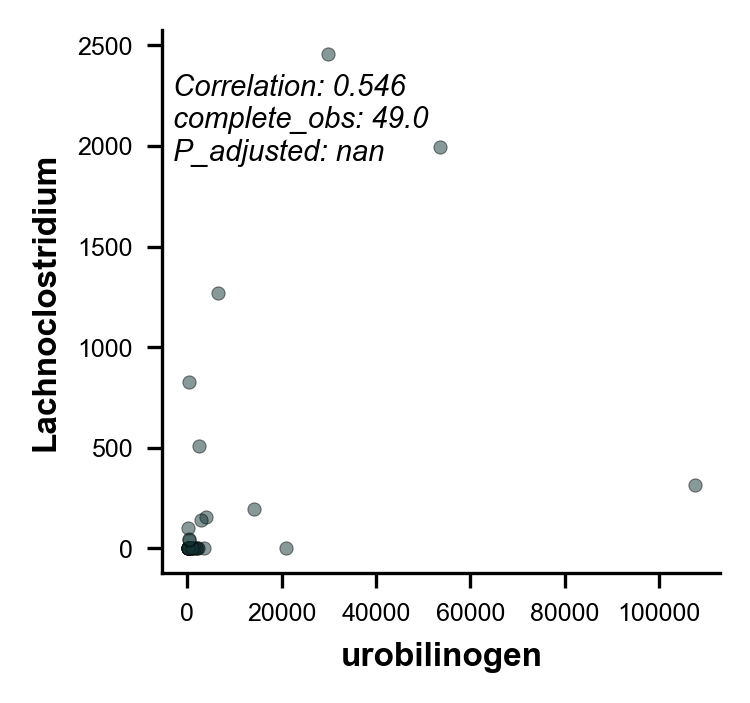

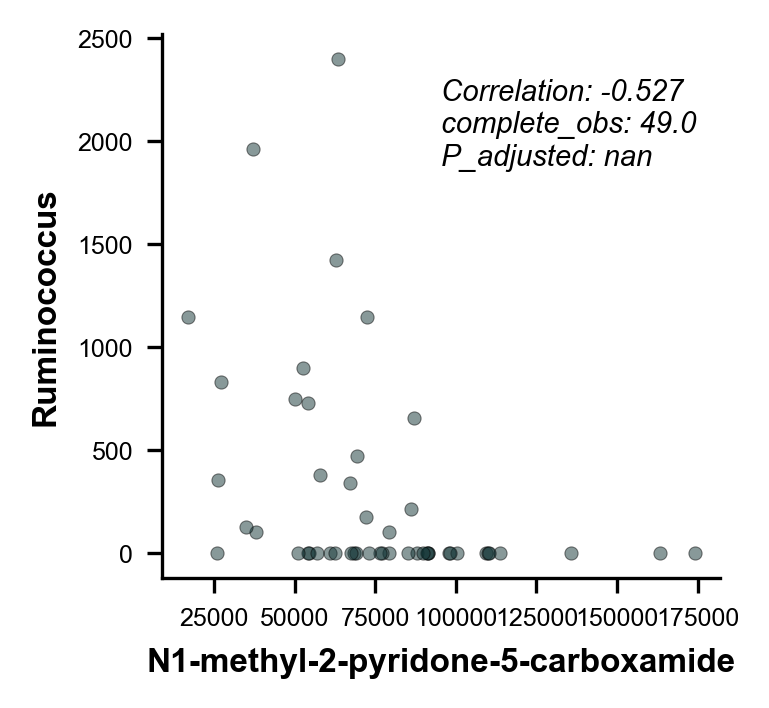

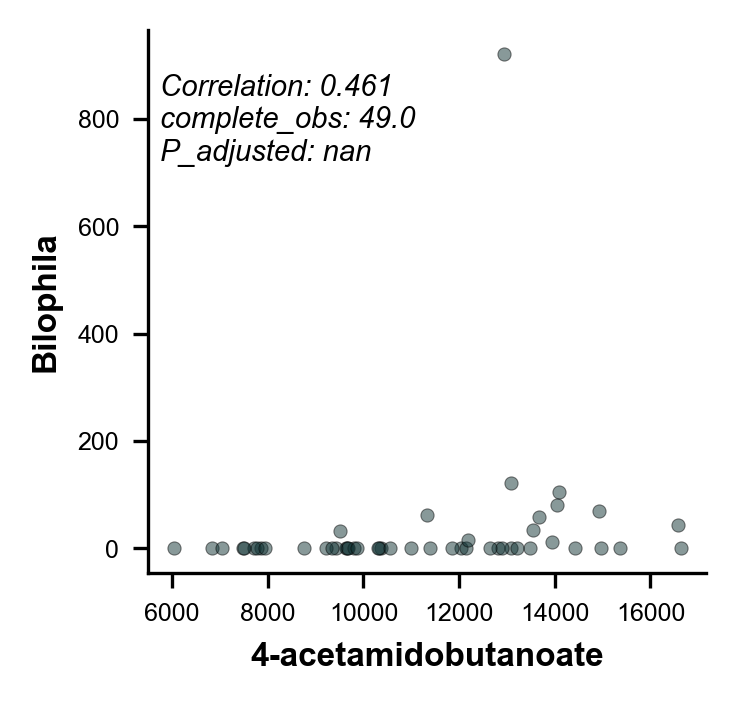

In [8]:
viz.b_scatter(dataX='~/Downloads/amino.txt', dataY='~/Downloads/microbe.txt', b_test='~/Downloads/btest_amino_microbe/X_Y.tsv', output_dir='.', n_ind=[1,2,24])

In [20]:
dataX

array([[3.8430e+03, 5.6290e+03, 4.4570e+03, ..., 5.6900e+02, 2.4830e+03,
        8.2700e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.9600e+02,
        0.0000e+00],
       [5.3680e+03, 6.7570e+03, 2.6950e+03, ..., 1.0807e+04, 2.2330e+03,
        4.1980e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 9.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [4]:
X_X, Y_Y, X_Y = btest.btest(X_path='~/Downloads/amino.txt',
                      Y_path='~/Downloads/microbe.txt',
                      outputpath='btest_amino_microbe',
                      method='spearman',
                      fdr=0.1,
                      min_var=0.0,
                      plot=True
                      )

Output files will be written to: /Users/rah/Documents/omicsEye/btest/notebooks/btest_amino_microbe
--- 38 samples/columns with all missing values have been removed from the first dataset 
--- 1 features with variation equal or less than 0.000 have been removed from the first dataset 
--- 19 features with variation equal or less than 0.000 have been removed from the second dataset 
Dataset X dimension  after cleaning:  (249, 49)
Dataset Y dimension  after cleaning:  (107, 49)
--- 0:00:03.575048 h:m:s similarity caluclation between two datasets features time ---
btest task completed successfully!!!


In [21]:
utils.write_results(X_Y, 'X_Y', '~/Downloads/btest_amino_microbe')

In [5]:
btest.check_requirements('/Users/rah/Documents/Downloads/btest_amino_microbe')

Creating output directory: /Users/rah/Documents/Downloads/btest_amino_microbe
Traceback (most recent call last):
  File "/Users/rah/Documents/omicsEye/btest/btest/btest.py", line 80, in check_requirements
    os.mkdir(output_dir)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/rah/Documents/Downloads/btest_amino_microbe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/ry/39y8fffn25q2jpw0b96hq5fh0000gn/T/ipykernel_30060/733227623.py", line 1, in <module>
    btest.check_requirements('/Users/rah/Documents/Downloads/btest_amino_microbe')
  File "/Users/rah/Documents/omicsEye/btest/btest/btest.py", line 82, in check_requirements
    sys.exit("CRITICAL ERROR: Unable to create output directory.")
SystemExit: CRITICAL ERROR: Unable to c

TypeError: object of type 'NoneType' has no len()

In [ ]:
associations

In [ ]:
#simtable = blockplot.load_order_table(outputpath + '/simtable.tsv', associations)
simtable = blockplot.load_order_table('/Users/rah/Dropbox/Ali-Docs/Research_docs/Projects/VastBiome/analysis/btest_bgc_mgx_replaceNA_FALSE_cov_25_measure_rpkg_mbx_pair_spearman_new//simtable.tsv', associations)

In [ ]:
X_Y

In [ ]:
blockplot.plot(
    simtable,
    associations,
    cmap="RdBu_r",
    mask=False,
    axlabels=["",""],
    outfile="/Users/rah/Documents/omicsEye/btest/demo/btest_output/blockplot.pdf",
    similarity="Spearman"
)

In [21]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [22]:
X_Y_3.head()

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
19872,Y92,Y93,0.978539,50.0,32.900503,0.0,0.0,0.016883,Y_Y
4500,X24,X25,0.971709,49.0,28.206115,0.0,0.0,0.016883,X_X
15170,Y2,Y26,0.969082,50.0,27.211086,0.0,0.0,0.016883,Y_Y
7216,X40,X77,0.968504,50.0,26.947950,0.0,0.0,0.016883,X_X
420,X2,X26,0.966043,50.0,25.903472,0.0,0.0,0.016883,X_X


In [80]:
n = 2
row = X_Y_3.iloc[n, :]
var1 = row.loc['Feature_1']
var2 = row.loc['Feature_2']
print(var1)
comp_type = row.loc['Type']
var1_ind = int(var1[1:])
var2_ind = int(var2[1:])
print(comp_type)

Y2
Y_Y


In [81]:
text_dict = {}
text_ann = ''
for key in ['Correlation', 'complete_obs', 'P_adjusted']:
    text_dict[key] = row.loc[key]
    text_ann = text_ann + key + ': '+ str(round(row.loc[key], 3)) + '\n'

In [82]:
if comp_type == 'X_X':
    var1_val = dataX[var1_ind]
    var2_val = dataX[var2_ind]
elif comp_type == 'X_Y':
    var1_val = dataX[var1_ind]
    var2_val = dataY[var2_ind]
else:
    var1_val = dataY[var1_ind]
    var2_val = dataY[var2_ind]

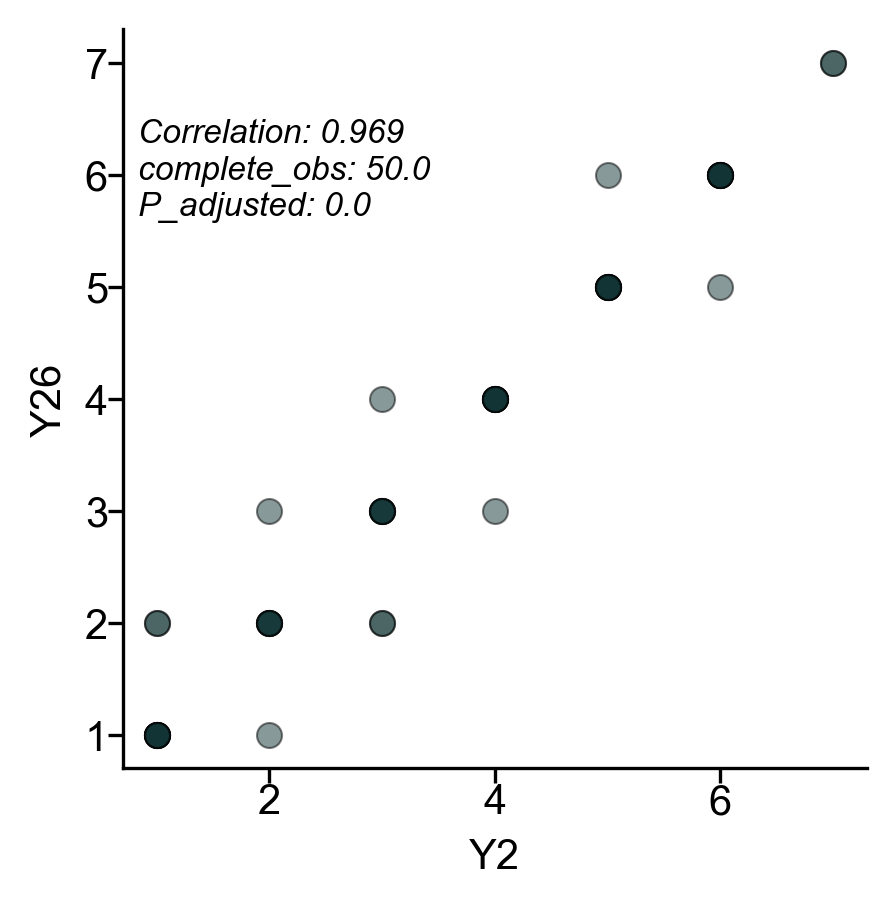

In [84]:
fig, ax = plt.subplots(1,1, figsize=(3.2,3.2), dpi = 300)
plt.scatter(x = var1_val, y=var2_val,
            edgecolors='#000',
            linewidths = .5,
            c = '#123435', alpha=.5, 
           marker="o")
plt.xlabel(var1)
plt.ylabel(var2)
if text_dict['Correlation'] > 0:
    plt.text(0.02,.7, text_ann,fontstyle = 'italic',
             transform=ax.transAxes, fontsize = 8)
else:
    plt.text(0.8,.7, text_ann, transform=ax.transAxes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(str(var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
plt.show()

In [99]:
def b_scatter(dataX, dataY, b_test, n_ind, min_var = 0, report_dir = '.'):
    assert type(dataX) == type(dataY), 'Type of dataX and dataY should be the same.'
    if isinstance(dataX, str):
        dataX, dataY, _, _ = utils.readData(dataX, dataY, min_var=min_var)
    if isinstance(b_test, str):
        b_test = pd.read_csv(btest)
    
    for n in n_ind:
        row = b_test.iloc[n, :]
        var1 = row.loc['Feature_1']
        var2 = row.loc['Feature_2']

        comp_type = row.loc['Type']
        var1_ind = int(var1[1:])
        var2_ind = int(var2[1:])

        text_dict = {}
        text_ann = ''
        for key in ['Correlation', 'complete_obs', 'P_adjusted']:
            text_dict[key] = row.loc[key]
            text_ann = text_ann + key + ': '+ str(round(row.loc[key], 3)) + '\n'

        if comp_type == 'X_X':
            var1_val = dataX[var1_ind]
            var2_val = dataX[var2_ind]
        elif comp_type == 'X_Y':
            var1_val = dataX[var1_ind]
            var2_val = dataY[var2_ind]
        else:
            var1_val = dataY[var1_ind]
            var2_val = dataY[var2_ind]

        fig, ax = plt.subplots(1,1, figsize=(3.2,3.2), dpi = 300)
        plt.scatter(x = var1_val, y=var2_val,
                    edgecolors='#000',
                    linewidths = .5,
                    c = '#123435', alpha=.5, 
                   marker="o")
        plt.xlabel(var1)
        plt.ylabel(var2)
        if text_dict['Correlation'] > 0:
            plt.text(0.02,.7, text_ann,fontstyle = 'italic',
                     transform=ax.transAxes, fontsize = 8)
        else:
            plt.text(0.8,.7, text_ann, transform=ax.transAxes)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.savefig(str(report_dir + '/' + var1 + '_' + var2 + '.pdf'), bbox_inches='tight')
        plt.show()
    return 'Done'

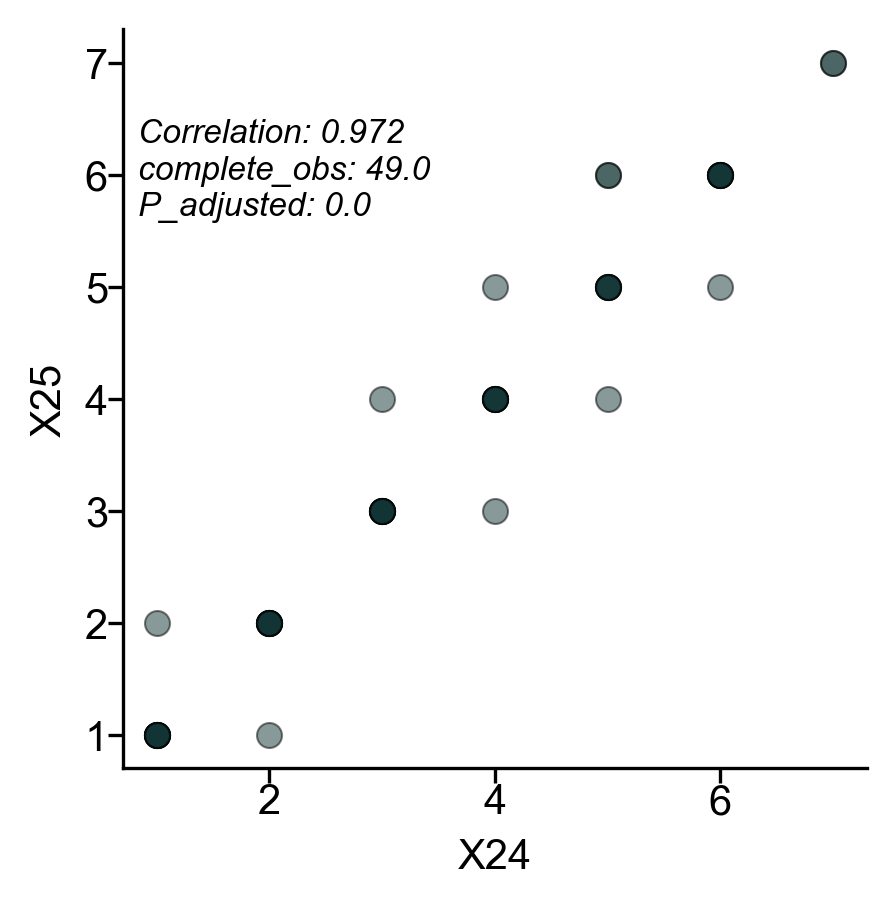

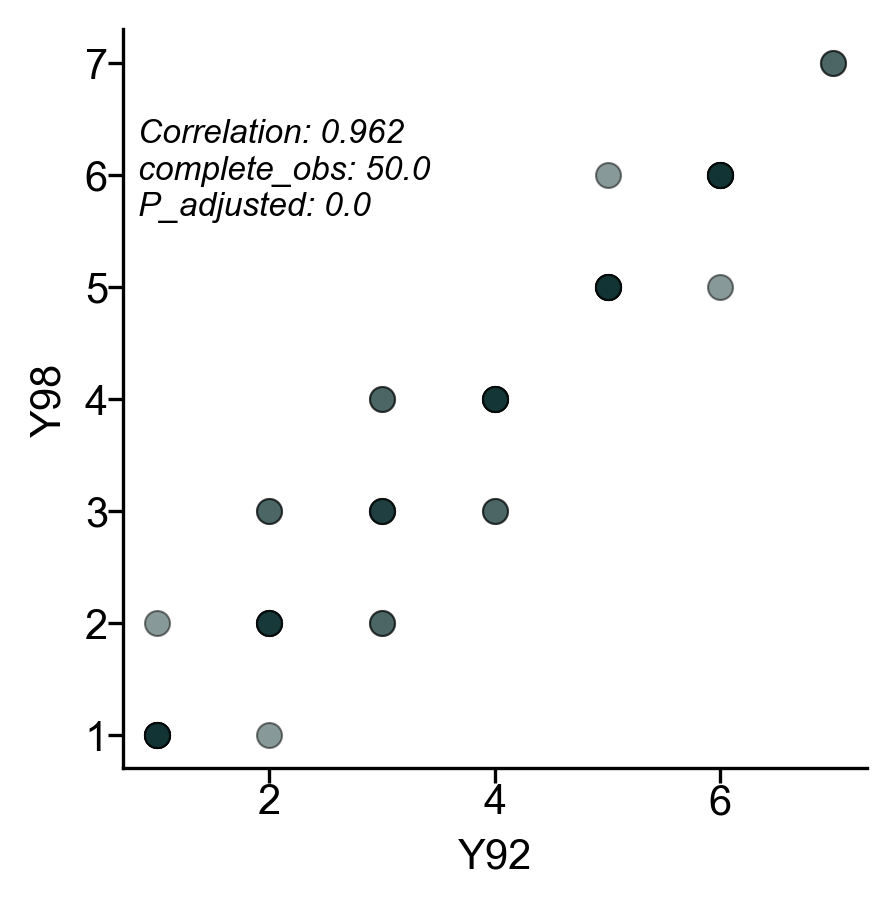

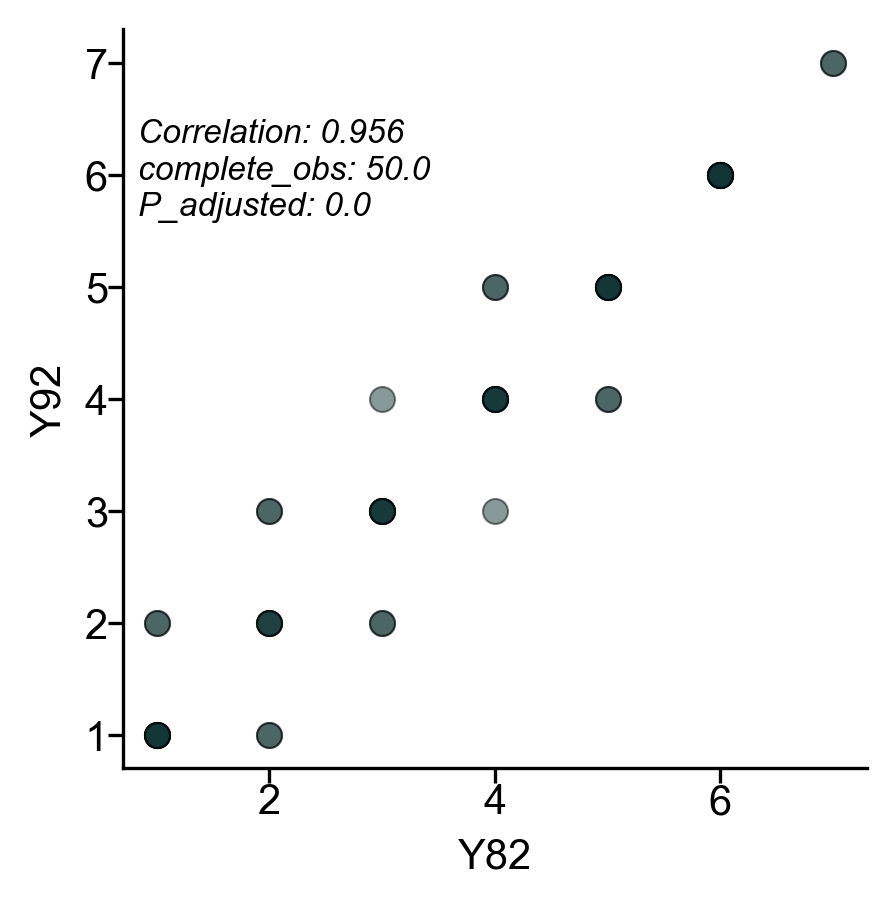

'Done'

In [100]:
b_scatter(dataX=dataX, dataY=dataY, b_test=X_Y_3, n_ind=[1,24,67])

Dataset X dimension  after cleaning:  (100, 50)
Dataset Y dimension  after cleaning:  (100, 50)


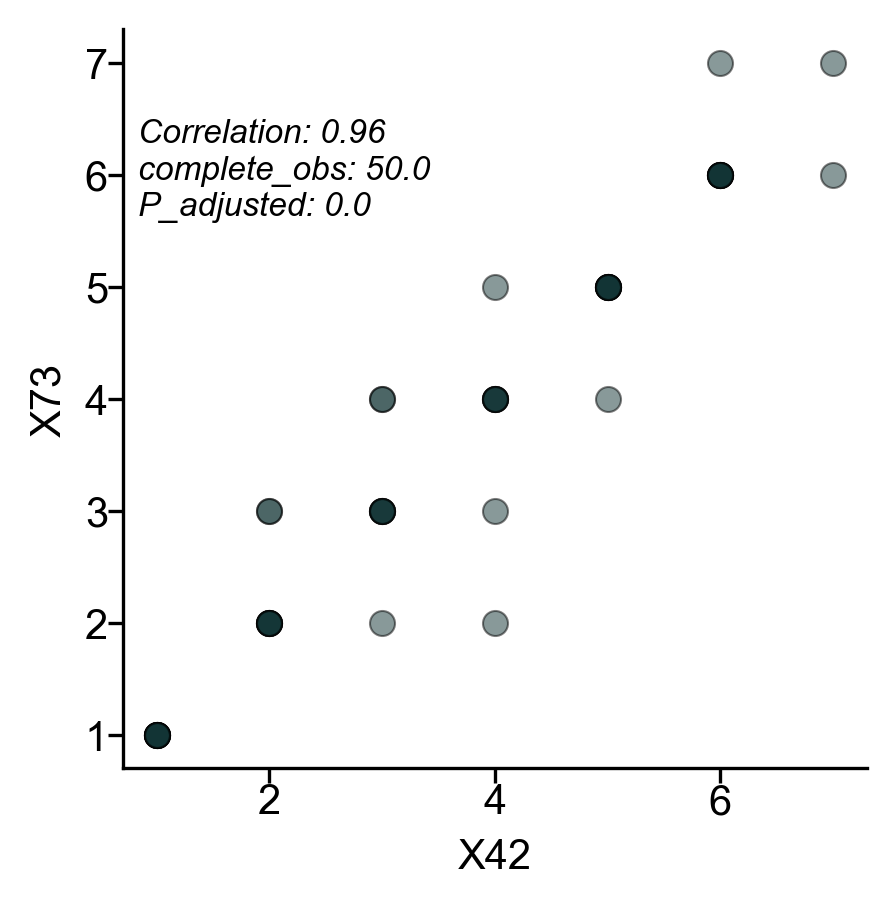

'Done'

In [102]:
b_scatter(dataX='../demo/X_dataset.txt', dataY='../demo/Y_dataset.txt',b_test=X_Y_3, n_ind=[32])

In [103]:
X_Y_3.to_csv('../notebooks/b_test_res.csv', index=False)

In [7]:
dataX , dataY, featuresX, featuresY  = utils.readData('../demo/donotaddtogithub/lipids.txt',
                                                      '../demo/donotaddtogithub/microbe.txt', min_var=min_var)

--- 38 samples/columns with all missing values have been removed from the first dataset 
--- 19 features with variation equal or less than 0.000 have been removed from the second dataset 
Dataset X dimension  after cleaning:  (287, 49)
Dataset Y dimension  after cleaning:  (107, 49)


In [8]:
%%time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y  = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

CPU times: user 16.1 s, sys: 33.1 ms, total: 16.1 s
Wall time: 16.1 s


In [9]:
X_Y.head()

,Feature_1,Feature_2,pval,Correlation,Not_NAs,P_adusted,bh_fdr_threshold,Type
22297,CE(16:1)_NH4,Holdemanella,0.000106,-0.525381,49,3.228319,0.508516,X_Y
6176,PC(P-36:4)/PC(O-36:5)_A,NaN,0.000179,-0.510441,49,2.721414,0.508516,X_Y
25353,TG(45:3)_NH4,[Eubacterium] hallii group,0.000250,0.510024,47,2.536336,0.508516,X_Y
11767,SM(d18:1/22:0)_Lipids,Prevotella,0.000256,-0.499727,49,1.950272,0.508516,X_Y
7249,PE(32:0),Intestinibacter,0.000285,0.496554,49,1.731819,0.508516,X_Y


# amino microbe test

In [2]:
method = 'spearman'
min_var = 0.0
fdr =0.05

In [3]:
dataX , dataY, featuresX, featuresY  = utils.readData('/Users/mbagh/Downloads/amino.txt', 
                                                      '/Users/mbagh/Downloads/microbe.txt', min_var=min_var)

--- 38 samples/columns with all missing values have been removed from the first dataset 
--- 1 features with variation equal or less than 0.000 have been removed from the first dataset 
--- 19 features with variation equal or less than 0.000 have been removed from the second dataset 
Dataset X dimension  after cleaning:  (249, 49)
Dataset Y dimension  after cleaning:  (107, 49)


In [4]:
%%time
within_X = utils.btest_corr(dataX, featuresX, method=method, fdr=fdr, Type='withinX')
within_Y  = utils.btest_corr(dataY, featuresY, method=method, fdr=fdr, Type='withinY')
dataAll = np.concatenate((dataX, dataY), axis=0)
X_Y = utils.btest_corr(dataAll, featuresX, featuresY, method=method, fdr=fdr, Type='X_Y')

/Users/mbagh/Documents/RahLab/btest/venv/lib/python3.9/site-packages/btest-1.1.2-py3.9.egg/btest/utils.py:299: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_f.loc[:, 't_statistic'] = (df_f.loc[:, 'Correlation']*
/Users/mbagh/Documents/RahLab/btest/venv/lib/python3.9/site-packages/btest-1.1.2-py3.9.egg/btest/utils.py:303: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_f.loc[:, 'pval'] = 2 * (1 - t.cdf(abs(df_f.loc[:, 't_statistic']),
/Users/mbagh/Documents/RahLab/btest/venv/lib/python3.9/site-packages/btest-1.1.2-py3.9.egg/btest/utils.py:310: Fut

CPU times: user 868 ms, sys: 20.7 ms, total: 889 ms
Wall time: 897 ms


/Users/mbagh/Documents/RahLab/btest/venv/lib/python3.9/site-packages/btest-1.1.2-py3.9.egg/btest/utils.py:299: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_f.loc[:, 't_statistic'] = (df_f.loc[:, 'Correlation']*
/Users/mbagh/Documents/RahLab/btest/venv/lib/python3.9/site-packages/btest-1.1.2-py3.9.egg/btest/utils.py:303: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_f.loc[:, 'pval'] = 2 * (1 - t.cdf(abs(df_f.loc[:, 't_statistic']),
/Users/mbagh/Documents/RahLab/btest/venv/lib/python3.9/site-packages/btest-1.1.2-py3.9.egg/btest/utils.py:310: Fut

In [5]:
X_Y.head()

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
31810,hydroxycotinine,metformin,1.0,44.0,inf,0.0,0.0,0.001144,X_X
60283,Alloprevotella,Peptococcus,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y
60292,Alloprevotella,Eisenbergiella,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y
60295,Alloprevotella,Coprobacter,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y
60306,Alloprevotella,Leuconostoc,1.0,49.0,inf,0.0,0.0,0.001144,Y_Y


In [18]:
within_X

,Feature_1,Feature_2,Correlation,complete_obs,t_statistic,pval,P_adjusted,bh_fdr_threshold,Type
28797,LPC(18:2),LPC(20:5),0.966429,49.0,25.786636,0.0,0.000000,0.002279,withinX
16396,citrulline,N-acetylhistidine,0.963647,49.0,24.726649,0.0,0.000000,0.002279,withinX
28664,LPC(16:0),LPC(18:3),0.961531,49.0,23.996995,0.0,0.000000,0.002279,withinX
13486,C8 carnitine,C10 carnitine,0.935102,49.0,18.090080,0.0,0.000000,0.002279,withinX
14766,C14:1 carnitine,C14:2 carnitine,0.906939,49.0,14.759585,0.0,0.000000,0.002279,withinX
...,...,...,...,...,...,...,...,...,...
24278,N-acetylhistamine,LPE(22:6),0.000000,9.0,0.000000,1.0,1.000130,0.002279,withinX
24283,N-acetylhistamine,PC(36:2),0.000000,9.0,0.000000,1.0,1.000097,0.002279,withinX
28222,urobilinogen,PE(P-34:2)/PE(O-34:3),0.000000,32.0,0.000000,1.0,1.000065,0.002279,withinX
20591,hydroxycotinine,metformin,1.000000,2.0,NaN,NaN,NaN,0.002279,withinX


In [7]:
X_Y['Type'].value_counts()

X_X    30875
X_Y    26462
Y_Y     5671
Name: Type, dtype: int64

In [22]:
x = dataX[featuresX.index('N-acetylhistidine')]
y = dataX[featuresX.index('metformin')]

In [23]:
x

array([10356., 12295.,  6243., 13405.,  7913., 10787.,  4081.,  9798.,
        9799., 15357.,  6878.,  7521., 12655., 13510.,  9753., 10143.,
        5492.,  5426.,  9746.,  9982.,  9090.,  6976., 12341., 12384.,
        6902., 12657.,  7110.,  9754., 16369.,  7400.,  8926.,  7868.,
       15438.,  6225.,  8878.,  7400.,  5853.,  7334.,  6964.,  1433.,
        7945.,  9520.,  7799.,  7113.,  9346., 12441., 11433., 10677.,
        6142.])

In [24]:
y

array([     nan,      nan,   44554.,      nan,      nan,      nan,
        418764.,      nan,      nan,      nan,  563505.,      nan,
        559989.,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan, 1457680.,      nan,      nan,
            nan,      nan,  337870.,      nan,      nan,      nan,
            nan])